# Making a 'spectrogram'!

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Considering the equation for a progressive wave, we can generated a signal...

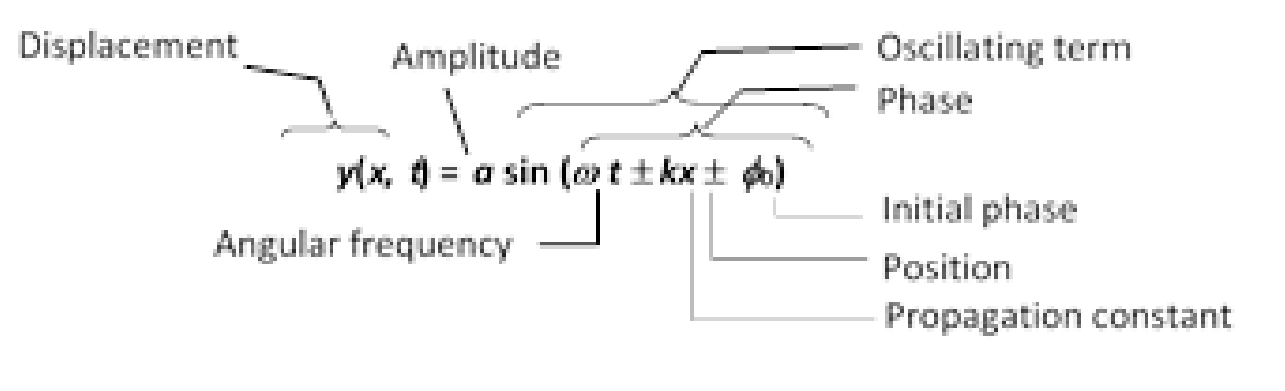

Let's consider only the time variation, so the 'x' vanishes

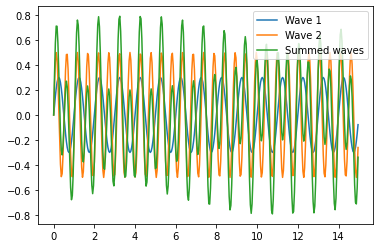

In [5]:
# generating a signal...

''' 
first we must have a domaing to solve the function (the 'time')
so, let's create a hourly time with 15 days long
'''
t = np.arange(0, 24*15, 1)

# wave 1 (diurnal wave 'Solar')
amp1 = 0.3
omega1 = 2*np.pi/24  # velocidade angular

# wave 2 (semi-diurnal wave 'Lunar')
amp2 = 0.5
omega2 = 2*np.pi/(12 + 25/60)

# generating the functions n(t)
n1 = amp1 * np.sin(t*omega1)
n2 = amp2 * np.sin(t*omega2)

plt.plot(t/24, n1, label='Wave 1')
plt.plot(t/24, n2, label='Wave 2')

plt.plot(t/24, n1+n2, label='Summed waves')
plt.legend()
plt.show()

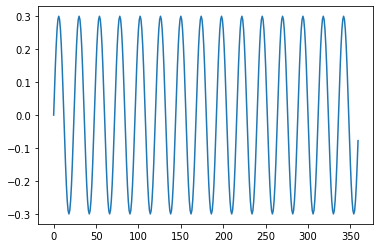

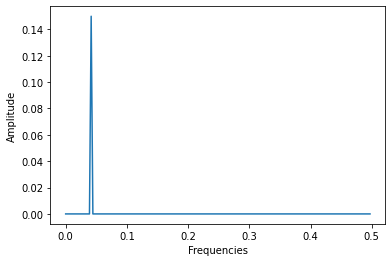

In [8]:
# Fast Fourier Transform --> time to frequency!

# For a single signal
signal = n1

sampling_interval = 1
sampling_frequency = 1/sampling_interval

samples = len(signal)

Fourier_transform = np.fft.fft(signal)/samples        # normalized amplitude
Fourier_transform = Fourier_transform[range(int(samples/2))]

values = np.arange(int(samples/2))
time_period = samples / sampling_frequency
frequencies = values / time_period

plt.plot(t, n1)
plt.show()

plt.plot(frequencies, abs(Fourier_transform))
plt.xlabel('Frequencies')
plt.ylabel('Amplitude')
plt.show()

In [10]:
# making a function...
def do_fft(signal, sampling_interval = 1):
#     sinal = n1
#     intervalo_amostral = 1
    sampling_frequency = 1/sampling_interval

    n_samples = len(signal)

    Fourier_transform = np.fft.fft(signal)/n_samples        
    Fourier_transform = Fourier_transform[range(int(n_samples/2))]

    values = np.arange(int(n_samples/2))
    time_period = n_samples / sampling_frequency
    frequencies = values / time_period
    
    return frequencies, abs(Fourier_transform)

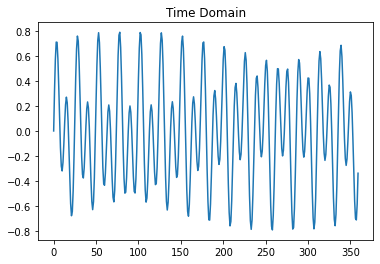

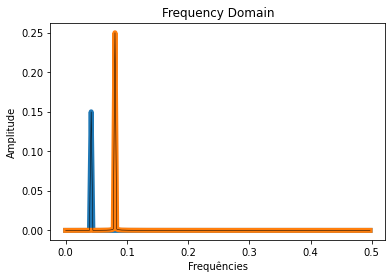

In [12]:
# working with the created signals above

f1, tf1 = do_fft(n1)
f2, tf2 = do_fft(n2)
f3, tf3 = do_fft(n1+n2)

plt.plot(t, n1+n2)
plt.title('Time Domain')
plt.show()

plt.plot(f1, tf1, lw=5)
plt.plot(f2, tf2, lw=5)
plt.plot(f3, tf3, lw=0.5, color='k')
plt.title('Frequency Domain')
plt.xlabel('Frequêncies')
plt.ylabel('Amplitude')
# plt.yscale('log')
# plt.xscale('log')
plt.show()